In [1]:
import warnings
warnings.filterwarnings("ignore")

import sys
if sys.version_info[0] < 3:
    raise Exception("Python 3 not detected.")
    
import numpy as np
import matplotlib.pyplot as plt
from scipy import io
from numpy import linalg as LA
from scipy.special import expit

data = io.loadmat("data/data.mat")
print("\nloaded data!")
fields = "y", "X", "X_test"
for field in fields:
    print(field, data[field].shape)


loaded data!
y (6000, 1)
X (6000, 12)
X_test (497, 12)


In [2]:
# normalize data

n_data = len(data['X'])
n_data_test = len(data['X_test'])
dim = len(data['X'][0])

# train data
L2_norm_train = np.array([LA.norm(data['X'][i]) for i in range(n_data)])
data['X'] = np.array([data['X'][i]/L2_norm_train[i] for i in range(n_data)])

# test data
L2_norm_test = np.array([LA.norm(data['X_test'][i]) for i in range(n_data_test)])
data['X_test'] = np.array([data['X_test'][i]/L2_norm_test[i] for i in range(n_data_test)])

In [3]:
# train-test split data

split = 0.2

n_train = int((1-split)*n_data)
n_valid = int(split*n_data)

X_train = data['X'][:n_train]
X_valid = data['X'][n_train:]

y_train = data['y'][:n_train]
y_valid = data['y'][n_train:]

In [4]:
# Batch Gradient Descent
# estimate weights (w) and alpha (additional dimension in w)

def grad_desc(X_train, y_train, learning_rate, n_iterations, regularization):
    
    w = np.zeros(dim+1)
    X = np.array([np.append(xi,1) for xi in X_train])

    for i in range(n_iterations):

        Xw = X.dot(w)
        s = expit(Xw)
        w = w + learning_rate*(X.T.dot(y_train.ravel() - expit(Xw)) - regularization * abs(w.dot(w)))
    
    return w

In [7]:
w = grad_desc(X_train, y_train, 0.001, 1000, 0.01)
w

array([14.94900738, -0.91998058, -2.63710362, -5.02081644, -2.46366521,
        3.2787129 , -5.94383336, -1.13844914,  3.27464917, -0.96319639,
       10.84197083, -2.03179668,  0.76129997])

In [8]:
# prediction
# P(X) = w*X + alpha
# Two classes: 1 if P(x) >= 0.5, else 0

def predict(X_valid, w):
    
    y_prediction = []
    y_prediction_class = []
    n_valid = len(X_valid)
    
    for i in range(n_valid):
        y = w.dot(np.append(X_valid[i],1))
        
        if y < 0.5:
            pred = 0
        else:
            pred = 1
            
        y_prediction.append(y)
        y_prediction_class.append(pred)
        
    return np.array(y_prediction_class), np.array(y_prediction)

In [9]:
y_prediction_class, y_prediction = predict(X_valid, w)
print(y_prediction_class)
print(y_prediction)

[1 0 1 ... 0 0 0]
[ 4.67508434 -1.5562997   6.60448543 ... -1.73294285 -1.32751478
 -3.27403359]


In [10]:
# calculate error

def error(y_pred, y_valid):
    count = list(y_pred == y_valid.ravel()).count(False)
    
    return count/n_valid

In [11]:
error_rate = error(y_prediction_class, y_valid)
error_rate

0.08666666666666667

In [12]:
# define cost function

def cost_fn(X_train, y_train, weights, regularization):
    
    J = 0
    for i in range(n_train):
        xW = np.append(X_train[i],1).dot(w)
        y = y_train[i]
        Ji = -sum(y * np.log(expit(xW)) + (1 - y) * np.log(1 - expit(xW)))
        J += Ji + regularization * sum(w.dot(w))
    
    return J

# Tune Hyperparameter

lowest error at: learning rate =  0.003463157894736842


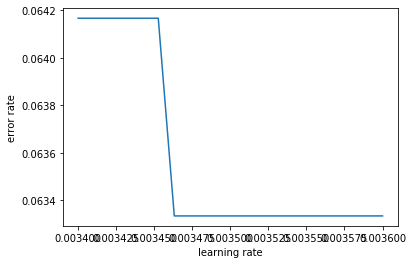

In [880]:
# check best learning rate

iterations = np.linspace(0.0034,0.0036,20)

error_rate_list = []
for i in iterations:
    w = grad_desc(X_train, y_train, i, 10000, 0)
    y_prediction_class, y_prediction = predict(X_valid, w)
    error_rate = error(y_prediction_class, y_valid)
    
    error_rate_list.append(error_rate)
    
print('lowest error at: learning rate =  ' + str(iterations[np.argmin(error_rate_list)]))   
    
plt.plot(iterations, error_rate_list)
plt.xlabel('learning rate')
plt.ylabel('error rate')
plt.show()

lowest error at: regularization parameter =  0.0


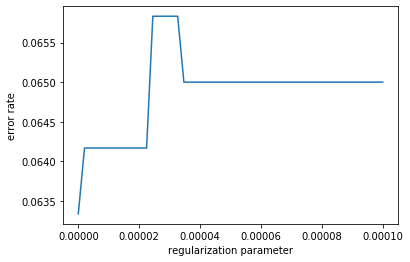

In [1001]:
# check best regularization parameter

iterations = np.linspace(0,.0001,50)

error_rate_list = []
for i in iterations:
    w = grad_desc(X_train, y_train, 0.003463157894736842, 10000, i)
    y_prediction_class, y_prediction = predict(X_valid, w)
    error_rate = error(y_prediction_class, y_valid)
    
    error_rate_list.append(error_rate)

print('lowest error at: regularization parameter =  ' + str(iterations[np.argmin(error_rate_list)]))
    
plt.plot(iterations, error_rate_list)
plt.xlabel('regularization parameter')
plt.ylabel('error rate')
plt.show()

final error = 0.049166666666666664


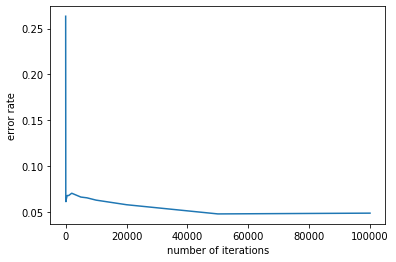

In [1002]:
# error vs number of iterations

iterations = [10,50,100,200,500,1000,2000,5000,7000,10000,20000,50000,100000
             ]

error_rate_list = []
for i in iterations:
    w = grad_desc(X_train, y_train, 0.003463157894736842, i, 0)
    y_prediction_class, y_prediction = predict(X_valid, w)
    error_rate = error(y_prediction_class, y_valid)
    
    error_rate_list.append(error_rate)

print('final error = ' + str(error_rate))    
    
plt.plot(iterations, error_rate_list)
plt.xlabel('number of iterations')
plt.ylabel('error rate')
plt.show()


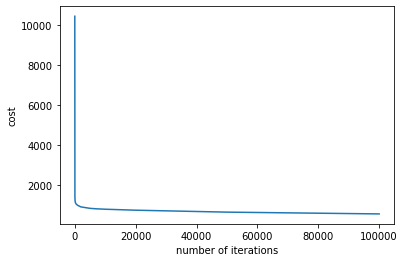

In [1003]:
# cost vs number of iterations

iterations = [10,50,100,200,500,1000,2000,5000,7000,10000,20000,50000,100000
             ]

cost_list = []
for i in iterations:
    w = grad_desc(X_train, y_train, 0.003463157894736842, i, 0)
    y_prediction_class, y_prediction = predict(X_valid, w)
    cost = cost_fn(X_train, y_train, w, 0)
    
    cost_list.append(cost)

plt.plot(iterations, cost_list)
plt.xlabel('number of iterations')
plt.ylabel('cost')
plt.show()


# SGD

In [1016]:
# Stochastic gradient descent

def grad_desc_stoch(X_train, y_train, learning_rate, n_iterations, regularization):
    
    np.random.seed(42)
    order = list(range(n_train))
    np.random.shuffle(order)
    
    w = np.zeros(dim+1)
    
    y = y_train[order]
    X = np.array([np.append(xi,1) for xi in X_train])
    X = X[order]

    for i in range(n_iterations):
        if i < n_train:
            Xw = X[i].dot(w)
            s = expit(Xw)
            w = w + learning_rate*(X.T.dot(y.ravel() - expit(Xw)) - regularization * abs(w.dot(w)))
        
        else:
            i = i%n_train
            Xw = X[i].dot(w)
            s = expit(Xw)
            w = w + learning_rate*(X.T.dot(y.ravel() - expit(Xw)) - regularization * abs(w.dot(w)))
        
    
    return w

In [1028]:
# Stochastic gradient descent v2 (shrinking learning rate)

def grad_desc_stoch2(X_train, y_train, learning_rate, n_iterations, regularization):
    
    np.random.seed(42)
    order = list(range(n_train))
    np.random.shuffle(order)
    
    w = np.zeros(dim+1)
    
    y = y_train[order]
    X = np.array([np.append(xi,1) for xi in X_train])
    X = X[order]

    for i in range(n_iterations):
        if i < n_train:
            Xw = X[i].dot(w)
            s = expit(Xw)
            w = w + learning_rate*(X.T.dot(y.ravel() - expit(Xw)) - regularization * abs(w.dot(w)))/(i+1)
        
        else:
            i = i%n_train
            Xw = X[i].dot(w)
            s = expit(Xw)
            w = w + learning_rate*(X.T.dot(y.ravel() - expit(Xw)) - regularization * abs(w.dot(w)))
        
    
    return w

# Tune Hyperparameter

lowest error at: learning rate =  0.02631578947368421


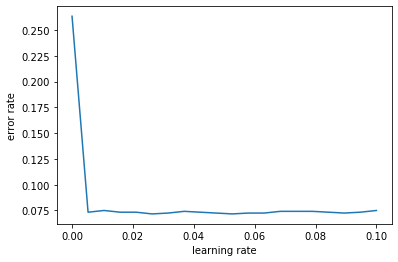

In [1007]:
# check best learning rate (v1)

iterations = np.linspace(0,0.1,20)

error_rate_list = []
for i in iterations:
    w = grad_desc_stoch(X_train, y_train, i, 10000, 0)
    y_prediction_class, y_prediction = predict(X_valid, w)
    error_rate = error(y_prediction_class, y_valid)
    
    error_rate_list.append(error_rate)
    
print('lowest error at: learning rate =  ' + str(iterations[np.argmin(error_rate_list)]))   
    
plt.plot(iterations, error_rate_list)
plt.xlabel('learning rate')
plt.ylabel('error rate')
plt.show()

lowest error at: regularization parameter =  0.0


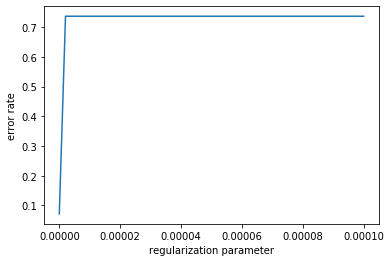

In [1009]:
# check best regularization parameter (v1)

iterations = np.linspace(0,.0001,50)

error_rate_list = []
for i in iterations:
    w = grad_desc_stoch(X_train, y_train, 0.02631578947368421, 10000, i)
    y_prediction_class, y_prediction = predict(X_valid, w)
    error_rate = error(y_prediction_class, y_valid)
    
    error_rate_list.append(error_rate)

print('lowest error at: regularization parameter =  ' + str(iterations[np.argmin(error_rate_list)]))
    
plt.plot(iterations, error_rate_list)
plt.xlabel('regularization parameter')
plt.ylabel('error rate')
plt.show()

10
50
100
200
500
1000
2000
5000
7000
10000
20000
50000
100000
final error = 0.07166666666666667


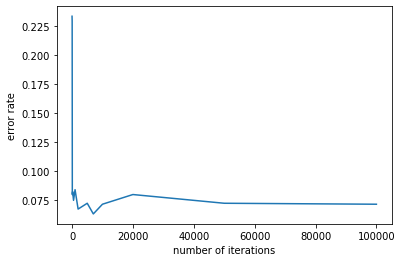

In [1010]:
# error vs number of iterations (v1)

iterations = [10,50,100,200,500,1000,2000,5000,7000,10000,20000,50000,100000
             ]

error_rate_list = []
for i in iterations:
    
    w = grad_desc_stoch(X_train, y_train, 0.02631578947368421, i, 0)
    y_prediction_class, y_prediction = predict(X_valid, w)
    error_rate = error(y_prediction_class, y_valid)
    
    error_rate_list.append(error_rate)
    print(i)
print('final error = ' + str(error_rate))    
    
plt.plot(iterations, error_rate_list)
plt.xlabel('number of iterations')
plt.ylabel('error rate')
plt.show()

lowest error at: learning rate =  0.47368421052631576


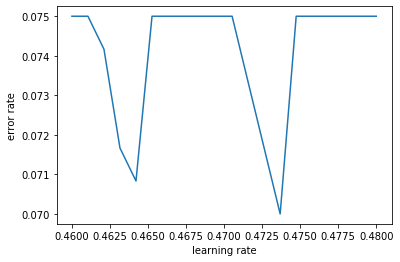

In [1031]:
# check best learning rate (v2)

iterations = np.linspace(0.46,0.48,20)

error_rate_list = []
for i in iterations:
    w = grad_desc_stoch2(X_train, y_train, i, 10000, 0)
    y_prediction_class, y_prediction = predict(X_valid, w)
    error_rate = error(y_prediction_class, y_valid)
    
    error_rate_list.append(error_rate)
    
print('lowest error at: learning rate =  ' + str(iterations[np.argmin(error_rate_list)]))   
    
plt.plot(iterations, error_rate_list)
plt.xlabel('learning rate')
plt.ylabel('error rate')
plt.show()

lowest error at: regularization parameter =  0.0


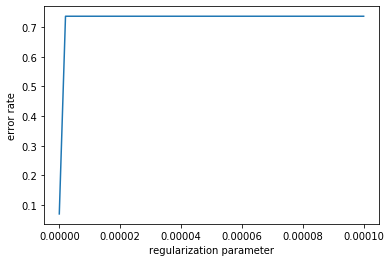

In [1032]:
# check best regularization parameter (v2)

iterations = np.linspace(0,.0001,50)

error_rate_list = []
for i in iterations:
    w = grad_desc_stoch2(X_train, y_train, 0.47368421052631576, 10000, i)
    y_prediction_class, y_prediction = predict(X_valid, w)
    error_rate = error(y_prediction_class, y_valid)
    
    error_rate_list.append(error_rate)

print('lowest error at: regularization parameter =  ' + str(iterations[np.argmin(error_rate_list)]))
    
plt.plot(iterations, error_rate_list)
plt.xlabel('regularization parameter')
plt.ylabel('error rate')
plt.show()

10
50
100
200
500
1000
2000
5000
7000
10000
20000
50000
100000
final error = 0.07166666666666667


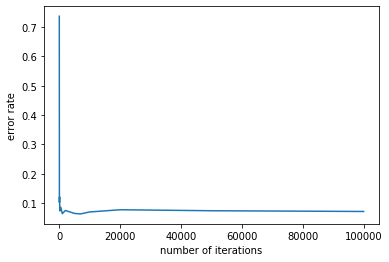

In [1040]:
# error vs number of iterations (v1)

iterations = [10,50,100,200,500,1000,2000,5000,7000,10000,20000,50000,100000
             ]

error_rate_list = []
for i in iterations:
    
    w = grad_desc_stoch2(X_train, y_train, 0.47368421052631576, i, 0)
    y_prediction_class, y_prediction = predict(X_valid, w)
    error_rate = error(y_prediction_class, y_valid)
    
    error_rate_list.append(error_rate)
    print(i)
print('final error = ' + str(error_rate))    
    
plt.plot(iterations, error_rate_list)
plt.xlabel('number of iterations')
plt.ylabel('error rate')
plt.show()

# Predict test data

In [15]:
# predict for Kaggle (BGD)

w = grad_desc(X_train, y_train, 0.003463157894736842, 10000000, 0)
y_prediction_class, y_prediction = predict(data['X_test'], w)

In [16]:
# A code snippet to help you save your results into a kaggle accepted csv
import pandas as pd

# Usage results_to_csv(clf.predict(X_test))
def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1  # Ensures that the index starts at 1. 
    df.to_csv('submission.csv', index_label='Id')

results_to_csv(np.array(y_prediction_class))
print('finish')

finish


In [1033]:
# predict for Kaggle (SGD)

w = grad_desc_stoch2(X_train, y_train, 0.47368421052631576, 100000, 0)
y_prediction_class, y_prediction = predict(data['X_test'], w)

In [1035]:
# A code snippet to help you save your results into a kaggle accepted csv
import pandas as pd

# Usage results_to_csv(clf.predict(X_test))
def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1  # Ensures that the index starts at 1. 
    df.to_csv('submission_sgd.csv', index_label='Id')

results_to_csv(np.array(y_prediction_class))
print('finish')

finish
